## Non-linear regression

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

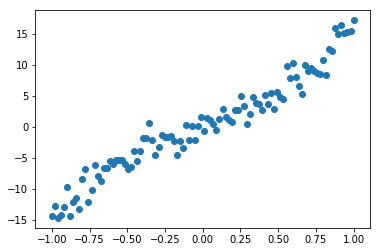

In [9]:
learning_rate = 0.01
training_epochs = 100
num_coeff = 6

training_error = np.zeros(training_epochs)

# Random values from -1 to 1
train_x = np.linspace(-1,1,100)

# Random coeff a,b,c for ax^2 + bx + x with polynomial of nom_coeff degree.
train_y_coeff = [1.] * np.random.randn(num_coeff) * 5
train_y = 0
for i in range(num_coeff):
    train_y += train_y_coeff[i] * np.power(train_x,i)
train_y += np.random.randn(*train_x.shape) * 1.5

plt.scatter(train_x, train_y)
plt.show()

In [10]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

def model(X, w):
    terms = []
    for i in range(num_coeff):
        term = tf.multiply(w[i], tf.pow(X,i))
        terms.append(term)
    return tf.add_n(terms)

w = tf.Variable([0.] * num_coeff, name = "parameters")
y_model = model(X,w)

In [11]:
cost = (tf.pow(Y-y_model,2))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    for (x,y) in zip(train_x, train_y):
        _, training_error[epoch] = sess.run([train_op,cost], feed_dict={X:x, Y:y})

w_val = sess.run(w)
print(w_val)
sess.close()

[0.10659198 9.168429   0.4185094  4.642947   0.48400256 2.4685612 ]


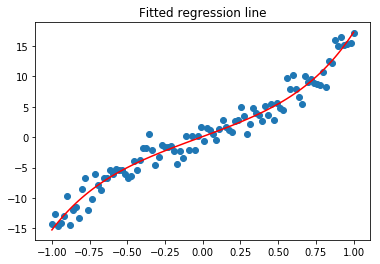

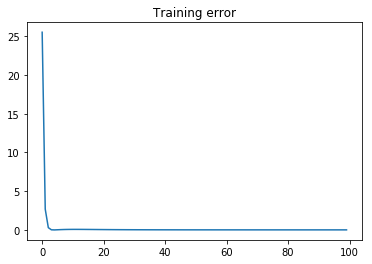

In [12]:
plt.scatter(train_x,train_y)

train_y2 = 0
for i in range(num_coeff):
    train_y2 += w_val[i] * np.power(train_x,i)

plt.title("Fitted regression line")
plt.plot(train_x,train_y2, 'r')
plt.show()

plt.title("Training error")
plt.plot(range(len(training_error)),training_error)
plt.show()